In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

import pandas as pd

path = "gdrive/My Drive/Colab Notebooks/EAAI21/data/"

Mounted at /content/gdrive/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def init_cancerGDV(
    xd = 0.04, 
    xg = 0.9, 
    xv = 0.06,
    ba = 2.5,
    bv = 2,
    c = 1,
    n_neigh = 4,
    dt = 0.0001,
    iter = 500000,
    rb = 10**(-1.5),
    fb = 10**(-1.5),
    d = None, timeup = None, timelow = None 
):
    """Function to plot static evolution of cancer game.

    Arguments
    ---------
        xd (float): subpopulation proportion of DEF tumor; 
            default 0.04

        xg (float): subpopulation proportion of GLY tumor; 
            default 0.9

        xv (float): subpopulation proportion of VOP tumor; 
            default 0.06

        ba (float): the benefit per unit of acidification; 
            default 2.5

        bv (float): the benefit from thge oxygen per unit of vascularization; 
            default 2

        c (float): the cost of production VEGF; default 1

        n_neigh (float): the number of GLY cells in the interaction group;
            default 4

        dt (float): time differentiation; 
            default 0.0001

        iter (int): tumors' evolutionary time dependency;
            default 500000
        
        rb (float): recovery barrier;
            default 10**(-1.5)
        
        fb (float): failure barrier;
            default 10**(-1.5)
        
        d (list): constrant medicine; 
            default 0
        
        timeup (list): upper time threshold of adding d;
            default None

        timelow (list): lower time threshold of adding d;
            default None
    Returns
    -------
        A matplotlib figure object containing the designated simplex.
    """

    # Evolution of subpopulation propotions
    xdpoints = [xd]
    xgpoints = [xg]
    xvpoints = [xv]
    ppoints = [xg]
    qpoints = [xv/(xv + xd)]

    game_proceed = 1
    game_cond = 0
    
    succeed = rb
    fail = 1-fb

    for t in range(iter):
        # 2-D tranformation
        q = xv/(xv + xd)
        p = xg

        sum_p = 0
        for k in range(0, n_neigh):
            sum_p += p**k
        
        # Replicator dynamic in 2-D transformation
        q = q + q * (1 - q) * (bv/(n_neigh+1) * sum_p - c) * dt
        if d != None and timeup != None and timelow != None:
            assert len(timeup) == len(timelow) == len(d)
            moves = len(d)
            for m in range(moves):
                if t >= timelow[m] and t < timeup[m]:    
                    p = p + p * (1 - p) * (ba/(n_neigh+1) - (bv - c) * q - d[m]) * dt
        else:
            p = p + p * (1 - p) * (ba/(n_neigh+1) - (bv - c) * q) * dt
        
        # Convert from 2-D to 3-D
        xd = (1 - q) * (1 - p)
        xg = p
        xv = (1 - p) * q

        ppoints.append(p)
        qpoints.append(q)

        xdpoints.append(xd)
        xgpoints.append(xg)
        xvpoints.append(xv)
        
        # Terminal condition
        if p < succeed:
            # print("Therapy succeed")
            game_cond = 1
            game_proceed = 0
            break
        elif p > fail:
            # print("Therapy fail")
            game_cond = 0
            game_proceed = 0
            break
    return game_cond, game_proceed

# Unavailable for now
def vis_2d(qpoints, ppoints, succeed, fail, xgpoints, xdpoints, xvpoints):
    # Constructing plot for visualization of the CancerGDV
    fig, ax = plt.subplots(2, figsize=(18,15))
    
    # Visualization of 2-D system
    ax[0].plot(qpoints, ppoints)
    ax[0].axhline(succeed, color="r", linestyle='dashed', label="Succeed barrier")
    ax[0].axhline(fail, color="g", linestyle='dashed', label="Fail barrier")

    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)

    ax[0].set_title("2-D representation of cancer game", fontweight="bold", fontsize='x-large')
    ax[0].set_xlabel("p points", fontweight="bold", fontsize='x-large')
    ax[0].set_ylabel("q points", fontweight="bold", fontsize='x-large')
    ax[0].legend()

    # Visualization of 3-D system
    length = len(xgpoints)
    ax[1].plot(np.arange(0, length, 1), xgpoints, label="GLY")
    ax[1].plot(np.arange(0, length, 1), xdpoints, label="DEF")
    ax[1].plot(np.arange(0, length, 1), xvpoints, label="VOP")

    ax[1].set_ylim(0, 1)

    # Color the changing part
    # Adjust for demonstration
    m = 0
    while m < moves:
        if timelow[m] > t:
            timelow.remove(timelow[m])
            timeup.remove(timeup[m])
            d.remove(d[m])
            moves = len(d)
        else:
            m += 1
    print(timelow)
    print(timeup)
    print(t)
    for m in range(moves):
        if timeup[m] < t:
            ax[1].axvspan(timelow[m], timeup[m], facecolor="red", alpha=0.25)
        else:
            ax[1].axvspan(timelow[m], t+1, facecolor="red", alpha=0.25)

    ax[1].set_title("3-D representation of cancer game", fontweight="bold", fontsize='x-large')
    ax[1].set_xlabel("Time", fontweight="bold", fontsize='x-large')
    ax[1].set_ylabel("Subpopulation proportions", fontweight="bold", fontsize='x-large')
    ax[1].legend()

    return fig

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import clear_output

init_xgpoints = []
init_xdpoints = []
init_xvpoints = []
game_proceed = []
game_cond = []
neigh = []
seed = 0
# Monte Carlo simulation for data gathering
for i in range(100000):
    # Instantiate random variable
    # Defining new init xg, xd, xv
    xg = np.random.uniform()
    xd = np.random.uniform()
    xv = 1-xg-xd

    # n_neigh
    # n_neigh = np.random.randint(low=0, high=100)

    # ba and bv undefined

    cond, proceed = init_cancerGDV(xg=xg, xd=xd, xv=xv)
    print('Finish game', i)
    
    init_xgpoints.append(xg)
    init_xdpoints.append(xd)
    init_xvpoints.append(xv)

    game_cond.append(cond)
    game_proceed.append(proceed) 
    neigh.append(n_neigh)

    if i%1000 == 0:
        clear_output(wait=True)

    if i%10000 == 0:
        seed += 10000
        df = pd.DataFrame(data={'XG': init_xgpoints, 'XD': init_xdpoints, 'XV': init_xvpoints, 'Terminated': game_proceed, 'Win': game_cond})
        df.to_csv(path + 'data.csv', index=False)

Finish game 48001
Finish game 48002
Finish game 48003
Finish game 48004
Finish game 48005
Finish game 48006
Finish game 48007
Finish game 48008
Finish game 48009
Finish game 48010
Finish game 48011
Finish game 48012
Finish game 48013
Finish game 48014
Finish game 48015
Finish game 48016
Finish game 48017
Finish game 48018
Finish game 48019
Finish game 48020
Finish game 48021
Finish game 48022
Finish game 48023
Finish game 48024
Finish game 48025
Finish game 48026
Finish game 48027
Finish game 48028
Finish game 48029
Finish game 48030
Finish game 48031
Finish game 48032
Finish game 48033
Finish game 48034
Finish game 48035
Finish game 48036
Finish game 48037
Finish game 48038
Finish game 48039
Finish game 48040
Finish game 48041
Finish game 48042
Finish game 48043
Finish game 48044
Finish game 48045
Finish game 48046
Finish game 48047
Finish game 48048
Finish game 48049
Finish game 48050
Finish game 48051
Finish game 48052
Finish game 48053
Finish game 48054
Finish game 48055
Finish gam

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def init_cancerGDV(
    xd = 0.04, 
    xg = 0.9, 
    xv = 0.06,
    ba = 2.5,
    bv = 2,
    c = 1,
    n_neigh = 4,
    dt = 0.0001,
    iter = 500000,
    rb = 10**(-1.5),
    fb = 10**(-1.5),
    d = None, timeup = None, timelow = None 
):
    """Function to plot static evolution of cancer game.

    Arguments
    ---------
        xd (float): subpopulation proportion of DEF tumor; 
            default 0.04

        xg (float): subpopulation proportion of GLY tumor; 
            default 0.9

        xv (float): subpopulation proportion of VOP tumor; 
            default 0.06

        ba (float): the benefit per unit of acidification; 
            default 2.5

        bv (float): the benefit from thge oxygen per unit of vascularization; 
            default 2

        c (float): the cost of production VEGF; default 1

        n_neigh (float): the number of GLY cells in the interaction group;
            default 4

        dt (float): time differentiation; 
            default 0.0001

        iter (int): tumors' evolutionary time dependency;
            default 500000
        
        rb (float): recovery barrier;
            default 10**(-1.5)
        
        fb (float): failure barrier;
            default 10**(-1.5)
        
        d (list): constrant medicine; 
            default 0
        
        timeup (list): upper time threshold of adding d;
            default None

        timelow (list): lower time threshold of adding d;
            default None
    Returns
    -------
        A matplotlib figure object containing the designated simplex.
    """

    # Evolution of subpopulation propotions
    xdpoints = [xd]
    xgpoints = [xg]
    xvpoints = [xv]
    ppoints = [xg]
    qpoints = [xv/(xv + xd)]

    game_proceed = 1
    game_cond = 0
    
    succeed = rb
    fail = 1-fb

    for t in range(iter):
        # 2-D tranformation
        q = xv/(xv + xd)
        p = xg

        sum_p = 0
        for k in range(0, n_neigh):
            sum_p += p**k
        
        # Replicator dynamic in 2-D transformation
        q = q + q * (1 - q) * (bv/(n_neigh+1) * sum_p - c) * dt
        if d != None and timeup != None and timelow != None:
            assert len(timeup) == len(timelow) == len(d)
            moves = len(d)
            for m in range(moves):
                if t >= timelow[m] and t < timeup[m]:    
                    p = p + p * (1 - p) * (ba/(n_neigh+1) - (bv - c) * q - d[m]) * dt
        else:
            moves = 0
            p = p + p * (1 - p) * (ba/(n_neigh+1) - (bv - c) * q) * dt
        
        # Convert from 2-D to 3-D
        xd = (1 - q) * (1 - p)
        xg = p
        xv = (1 - p) * q

        ppoints.append(p)
        qpoints.append(q)

        xdpoints.append(xd)
        xgpoints.append(xg)
        xvpoints.append(xv)
        
        # Terminal condition
        if p < succeed:
            print("Therapy succeed")
            game_cond = 1
            game_proceed = 0
            break
        elif p > fail:
            print("Therapy fail")
            game_cond = 0
            game_proceed = 0
            break

    # Constructing plot for visualization of the CancerGDV
    fig, ax = plt.subplots(2, figsize=(18,15))
    
    # Visualization of 2-D system
    ax[0].plot(qpoints, ppoints)
    ax[0].axhline(succeed, color="r", linestyle='dashed', label="Succeed barrier")
    ax[0].axhline(fail, color="g", linestyle='dashed', label="Fail barrier")

    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)

    ax[0].set_title("2-D representation of cancer game", fontweight="bold", fontsize='x-large')
    ax[0].set_xlabel("p points", fontweight="bold", fontsize='x-large')
    ax[0].set_ylabel("q points", fontweight="bold", fontsize='x-large')
    ax[0].legend()

    # Visualization of 3-D system
    length = len(xgpoints)
    ax[1].plot(np.arange(0, length, 1), xgpoints, label="GLY")
    ax[1].plot(np.arange(0, length, 1), xdpoints, label="DEF")
    ax[1].plot(np.arange(0, length, 1), xvpoints, label="VOP")

    ax[1].set_ylim(0, 1)

    # Color the changing part
    # Adjust for demonstration
    m = 0

    while m < moves:
        if timelow[m] > t:
            timelow.remove(timelow[m])
            timeup.remove(timeup[m])
            d.remove(d[m])
            moves = len(d)
        else:
            m += 1

    for m in range(moves):
        if timeup[m] < t:
            ax[1].axvspan(timelow[m], timeup[m], facecolor="red", alpha=0.25)
        else:
            ax[1].axvspan(timelow[m], t+1, facecolor="red", alpha=0.25)

    ax[1].set_title("3-D representation of cancer game", fontweight="bold", fontsize='x-large')
    ax[1].set_xlabel("Time", fontweight="bold", fontsize='x-large')
    ax[1].set_ylabel("Subpopulation proportions", fontweight="bold", fontsize='x-large')
    ax[1].legend()

    return fig

Therapy fail


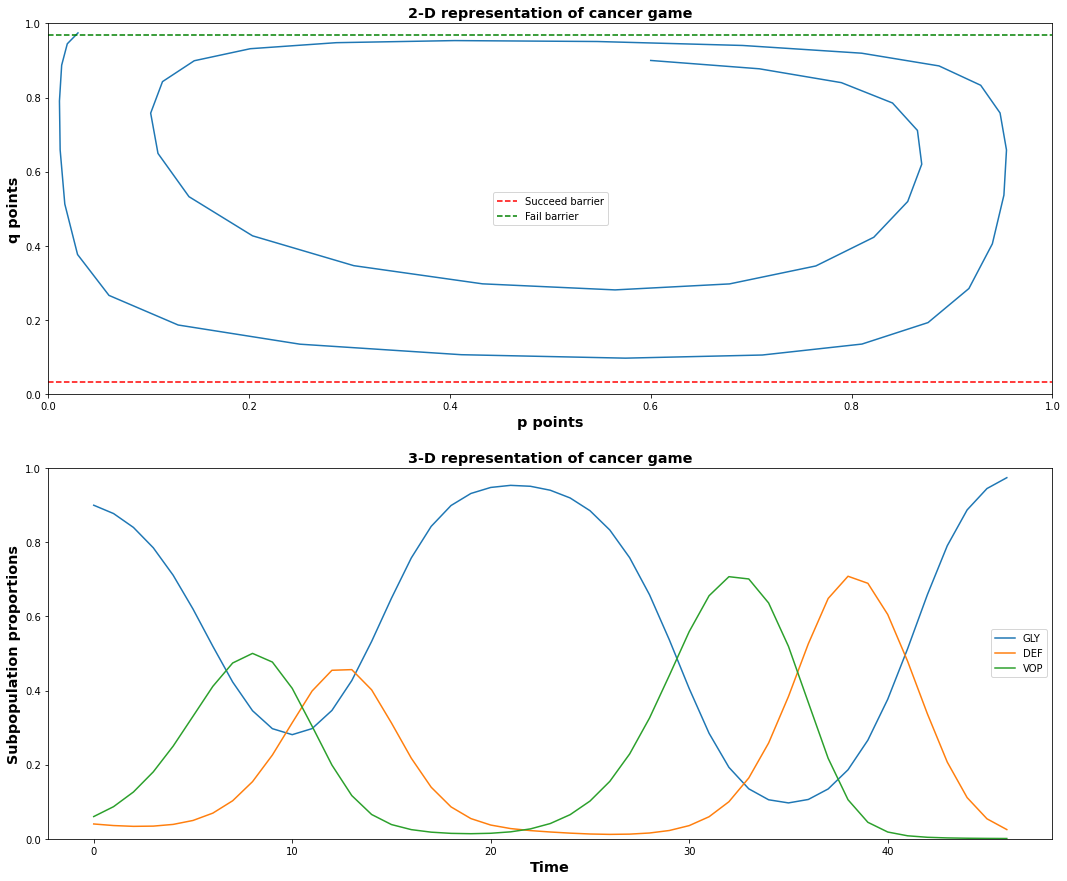

In [42]:
init_cancerGDV(dt=1.2, iter=500)
plt.show()